# Concise Implementation of Multilayer Perceptron

:label:`sec_mlp_gluon`


As you might expect, by relying on the Gluon library,
we can implement MLPs even more concisely.

In [1]:
import d2l
from mxnet import gluon, init, npx
from mxnet.gluon import nn
npx.set_np()

## The Model

As compared to our gluon implementation 
of softmax regression implementation
(:numref:`sec_softmax_gluon`),
the only difference is that we add 
*two* `Dense` (fully-connected) layers 
(previously, we added *one*).
The first is our hidden layer, 
which contains *256* hidden units
and applies the ReLU activation function.
The second, is our output layer.

In [2]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

Note that Gluon, as usual, automatically
infers the missing input dimensions to each layer.

The training loop is *exactly* the same
as when we implemented softmax regression.
This modularity enables us to separate 
matterns concerning the model architecture
from orthogonal considerations.

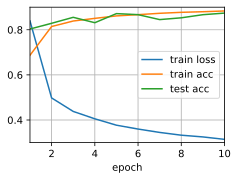

In [3]:
batch_size, num_epochs = 256, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Exercises

1. Try adding different numbers of hidden layers. What setting (keeping other parameters and hyperparameters constant) works best? 
1. Try out different activation functions. Which ones work best?
1. Try different schemes for initializing the weights. What method works best?

## [Discussions](https://discuss.mxnet.io/t/2340)

![](../img/qr_mlp-gluon.svg)